## Predição da precificação de casas 
### House Sales in King County, USA - Kaggle

### Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

### Preparação do ambiente

- Link para o dataset - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Tratando os dados

Foi observado que as medidas do dataframe estão em pés quadrados, então primeiro será realizado uma conversão para metros quadrados e em seguida uma verificação de valores NaN.

#### Conversão de pés quadrados para metros quadrados

In [4]:
df['sqft_living'] = (df['sqft_living'] / 10.764).round(3)
df['sqft_lot'] = (df['sqft_lot'] / 10.764).round(3)
df['sqft_above'] = (df['sqft_above'] / 10.764).round(3)
df['sqft_basement'] = (df['sqft_basement'] / 10.764).round(3)
df['sqft_living15'] = (df['sqft_living15'] / 10.764).round(3)
df['sqft_lot15'] = (df['sqft_lot15'] / 10.764).round(3)

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.625,524.898,1.0,0,0,...,7,109.625,0.000,1955,0,98178,47.5112,-122.257,124.489,524.898
1,6414100192,20141209T000000,538000.0,3,2.25,238.759,672.798,2.0,0,0,...,7,201.598,37.161,1951,1991,98125,47.7210,-122.319,157.005,709.680
2,5631500400,20150225T000000,180000.0,2,1.00,71.535,929.023,1.0,0,0,...,6,71.535,0.000,1933,0,98028,47.7379,-122.233,252.694,748.978
3,2487200875,20141209T000000,604000.0,4,3.00,182.088,464.511,1.0,0,0,...,7,97.547,84.541,1965,0,98136,47.5208,-122.393,126.347,464.511
4,1954400510,20150218T000000,510000.0,3,2.00,156.076,750.650,1.0,0,0,...,8,156.076,0.000,1987,0,98074,47.6168,-122.045,167.224,697.046
5,7237550310,20140512T000000,1225000.0,4,4.50,503.530,9469.528,1.0,0,0,...,11,361.390,142.140,2001,0,98053,47.6561,-122.005,442.215,9469.528
6,1321400060,20140627T000000,257500.0,3,2.25,159.327,633.501,2.0,0,0,...,7,159.327,0.000,1995,0,98003,47.3097,-122.327,207.915,633.501
7,2008000270,20150115T000000,291850.0,3,1.50,98.476,902.174,1.0,0,0,...,7,98.476,0.000,1963,0,98198,47.4095,-122.315,153.289,902.174
8,2414600126,20150415T000000,229500.0,3,1.00,165.366,693.980,1.0,0,0,...,7,97.547,67.819,1960,0,98146,47.5123,-122.337,165.366,753.716
9,3793500160,20150312T000000,323000.0,3,2.50,175.585,609.439,2.0,0,0,...,7,175.585,0.000,2003,0,98038,47.3684,-122.031,222.036,703.270


#### Verificando NaN

In [5]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


É possivel observar que o DataFrame não possui valores NaN

### Qual é o principal atrativo das casas mais visitadas?

In [6]:
# descobrindo as correlações com a varial 'view'
df.corr()['view'].sort_values(ascending=False).head(6)

view             1.000000
waterfront       0.401857
price            0.397293
sqft_living      0.284611
sqft_living15    0.280439
sqft_basement    0.276947
Name: view, dtype: float64

Será utilizado as duas variaveis que possuem a maior correlação com a variavel **view** para a analise em questão.

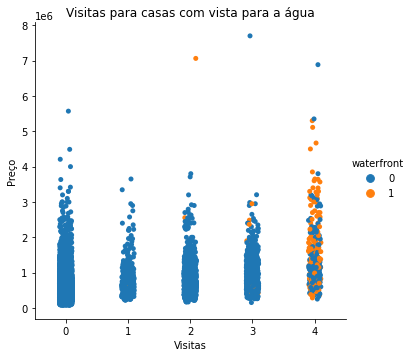

In [7]:
ax_2 = sns.catplot(x="view", y="price", hue="waterfront", data=df)

ax_2.set_axis_labels("Visitas", "Preço")
plt.title("Visitas para casas com vista para a água")

plt.show()

As casas mais visitadas foram classificadas entre **0** para menos visitas e **4** para as mais visitadas.

O grafico indica que **as casas mais visitadas são aquelas que possuem vista para a água** (**waterfront**), onde **0** (em azul) representa as casas que não possuem vista para água e **1** (em laranja) representam as casas que possuem vista para a água. 

### Investigando a correlação das variaveis com as notas de qualidade das casas

Será utilizado o metodo de correlação de <a href="https://operdata.com.br/blog/coeficientes-de-correlacao/">**Spearman**</a> afim de entender quais variaveis possuem uma correlação mais forte com as notas de qualidade das casas. O metodo de Spearman possui um grau de correlação de variaveis não só quantitativas como também variaveis do tipo ordinal; e as classificam entre -1 e 1. Se o resultado que está proximo de 0 indica que não há correlação entre as variaves. Assim, quanto mais proximo de -1 ou 1 mais forte é a correlação.

Nesse caso iremos observar a correlação com variavel **grade**. 

In [8]:
df.corr(method='spearman')['grade'].sort_values(ascending=False).head()

grade            1.000000
sqft_living      0.716400
sqft_above       0.711815
sqft_living15    0.662635
price            0.658215
Name: grade, dtype: float64

A variavel **sqft_living** possui a maior correlação com a variavel **grade**.

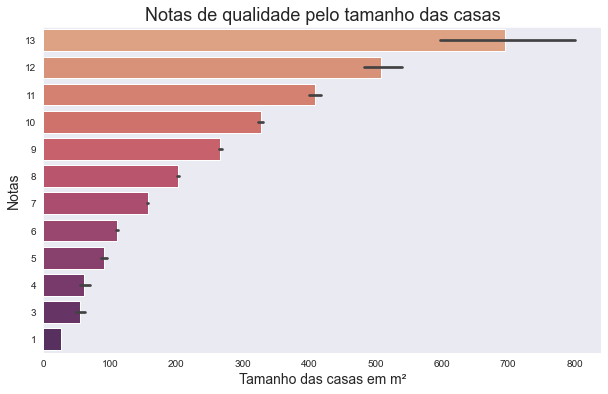

In [24]:
sns.set_style('dark')
plt.figure(figsize=[10,6])

unicos = np.sort(df['grade'].unique()) # variavel responsavel por ordenar a coluna
ax_1 = sns.barplot(x = 'sqft_living', y = 'grade', data = df, orient='h', palette="flare", order= unicos[::-1]) # invertendo ordem no metodo order
ax_1.set_title('Notas de qualidade pelo tamanho das casas', loc='center', fontsize=18)
ax_1.set_xlabel('Tamanho das casas em m²', fontsize=14)
ax_1.set_ylabel('Notas', fontsize=14)
plt.show()

É notavel que o tamanho da casa influência na sua nota de qualidade. Quanto maior o tamanho da casa (**sqft_living**), maior será a nota de qualidade segundo o King County (**grade**). 

### Analise exploratoria sobre o conjunto de dados

In [11]:
import numpy as np

n_observacoes = len(df.index)
n_variaveis = len(df.columns)
media_casa = df['sqft_living'].mean()
mediana_casa = np.percentile(df['sqft_living'], 50)
q1 = np.percentile(df['sqft_living'], 25, interpolation = 'midpoint')
q3 = np.percentile(df['sqft_living'], 75, interpolation = 'midpoint')

print('Existem {} observações no conjunto de dados'.format(n_observacoes))
print('Existem {} variaveis no conjunto de dados'.format(n_variaveis))
print('O tamanho médio das casa é de {:.1f} metros quadrados'.format(media_casa))
print('A mediana do tamanho das casas é de {} metros quadrados'.format(mediana_casa))

print('primeiro quartil {} do tamanho das casas'.format(q1))
print('terceiro quartil {} do tamanho das casas'.format(q3))

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casa é de 193.2 metros quadrados
A mediana do tamanho das casas é de 177.443 metros quadrados
primeiro quartil 132.572 do tamanho das casas
terceiro quartil 236.901 do tamanho das casas


Verificando existencia de outliers no preço das casas

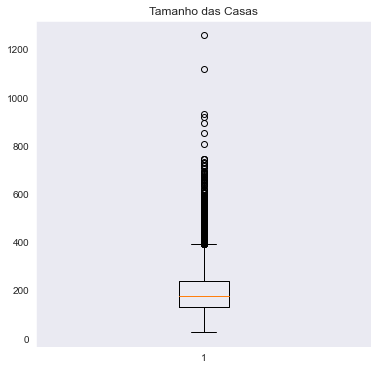

In [12]:
fig1, ax1 = plt.subplots(figsize=[6,6])
ax1.set_title('Tamanho das Casas')
ax1.boxplot(df['sqft_living'])
plt.show()

Existe uma quantidade significativa de casas que possuem o tamanho muito acima do limite superior do boxsplot, o que configura a presença de outliers.

##### Removendo outliers do preço das casas

In [14]:
q1_price = np.percentile(df['price'], 25, interpolation = 'midpoint')
q3_price = np.percentile(df['price'], 75, interpolation = 'midpoint')

lim_superior = q3_price + 1.5 * (q3_price - q1_price)
df_preco = df[(df['price'] < lim_superior)]
df_vista = df[(df['waterfront'] != 0) & (df['price'] < 4062500.0)] # removendo os principais outliers mas conservando a variavel 'waterfront'
df_sem_outlier = pd.concat([df_preco, df_vista])


C:\Users\brodr\AppData\Local\Temp\ipykernel_2980\4259767974.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_price = np.percentile(df['price'], 25, interpolation = 'midpoint')
C:\Users\brodr\AppData\Local\Temp\ipykernel_2980\4259767974.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3_price = np.percentile(df['price'], 75, interpolation = 'midpoint')


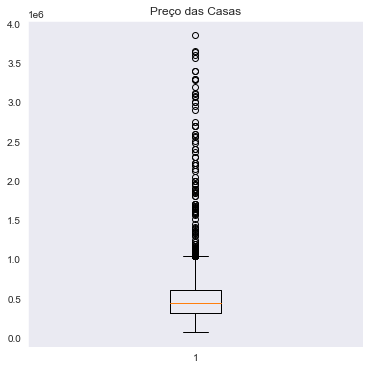

In [15]:
fig2, ax2 = plt.subplots(figsize=[6,6])
ax2.set_title('Preço das Casas')
ax2.boxplot(df_sem_outlier['price'])
plt.show()


Nota-se que não houve a remoção completa do outliers. A remoção de todos os outliers enviesa os resultados da coluna 'waterfront', que possui a maior parte das casas mais caras; por isso julguei ser importante para os resultados dos modelos a permanencia desse dado.

### Construindo modelo de regressão linear com **statsmodels.api**.


In [13]:
import statsmodels.api as sm
from patsy import dmatrices

In [16]:
y, X = dmatrices('price ~ grade + sqft_living + sqft_living15 + sqft_above + bathrooms + lat + bedrooms + floors + view + sqft_basement + sqft_lot + yr_renovated + sqft_lot15 + yr_built + waterfront + condition', data=df_sem_outlier, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2989.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:57:07   Log-Likelihood:            -2.7248e+05
No. Observations:               20625   AIC:                         5.450e+05
Df Residuals:                   20608   BIC:                         5.451e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.316e+07   3.62e+05    -63.971      0.000   -2.39e+07   -2.25e+07
grade          7.578e+04   1468.556     51.602      0.000    7.29e+04    7.87e+04
sqft_living    9.175e+06   2.86e+06      3.205      0.001    3.56e+06    1.48e+07
sqft_living15   518.6452     26.287     19.730      0.000     467.120     570.170
sqft_above    -9.174e+06   2.86e+06     -3.205      0.001   -1.48e+07   -3.56e+06
bathrooms       2.26e+04   2243.415     10.074      0.000    1.82e+04     2.7e+04
lat             5.49e+05   6939.185     79.113      0.000    5.35e+05    5.63e+05
bedrooms      -1.158e+04   1295.970     -8.932      0.000   -1.41e+04   -9035.908
floors         2.849e+04   2435.565     11.697      0.000    2.37e+04    3.33e+04
view           2.865e+04   1584.644     18.081      0.000    2.55e+04    3.18e+04
sqft_basement -9.174e+06   2.86e+06     -3.205      0.001   -1.48e+07   -3.56e+06
sqft_lot          2.3539      0.351      6.704      0.000       1.666       3.042
yr_renovated      9.5548      2.545      3.755      0.000       4.567      14.542
sqft_lot15       -2.4095      0.535     -4.500      0.000      -3.459      -1.360
yr_built      -1749.9232     47.237    -37.045      0.000   -1842.512   -1657.334
waterfront     5.608e+05   1.05e+04     53.220      0.000     5.4e+05    5.81e+05
condition      2.868e+04   1570.348     18.265      0.000    2.56e+04    3.18e+04
==============================================================================
Omnibus:                    10659.580   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408220.128
Skew:                           1.831   Prob(JB):                         0.00
Kurtosis:                      24.485   Cond. No.                     2.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Construindo modelo de regressão linear com **sklearn**.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error


In [19]:
df_1 = df_sem_outlier

X = df_1.drop(['price', 'date', 'id', 'zipcode'], axis= 1)
y = df_1.price

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [20]:
print(f'Valor R²: {r2_score(y_test, y_pred):.3f}')
print(f'Valor MAE: {mean_absolute_error(y_test, y_pred):.3f}')

Valor R²: 0.689
Valor MAE: 92966.761


Selecionando as 5 variaveis mais importantes usando **RFE**.

In [21]:
from sklearn.feature_selection import RFE

df_2 = df_sem_outlier

X = df_2.drop(['price', 'date', 'id', 'zipcode'], axis= 1)
y = df_2.price

X_std = StandardScaler().fit_transform(X)

lr_2 = LinearRegression()
selecionar_colunas = RFE(lr_2, n_features_to_select= 5, step= 1)
selecionar_colunas = selecionar_colunas.fit(X, y)

In [22]:
print(selecionar_colunas.get_feature_names_out())

['sqft_living' 'waterfront' 'sqft_above' 'sqft_basement' 'lat']


Essas são as 5 variaveis mais importantes: **sqft_living**, **waterfront**, **sqft_above**, **sqft_basement** e **lat**.

Verificando o ${R}^{2}$ e $MAE$ do modelo usando as 5 variaveis definidas pelo **RFE**.

In [23]:

X = df_2[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']] # features do seletor
y = df_2.price

X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Valor R²: {r2_score(y_test, y_pred):.3f}')
print(f'Valor MAE: {mean_absolute_error(y_test, y_pred):.3f}')

Valor R²: 0.601
Valor MAE: 108797.796


O modelo anterior é melhor por possuir o **R²** mais proximo de 1.0 e o erro médio absoluto menor (**MAE**).